## Zero Crossing Rate (ZCR)

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path = "../audio/the_changeling.mp3"
y, sr = librosa.load(path)

### Some Visualizations

first lets explain what we are even working  with. signals are simply functions of time, these can be in discrete or continuous time intervals. thus, an audio file represents the amplitude of a signal and how it changes through time. the way this file is actually represented varies, and can be complex

WAV files typically store raw, uncompressed audio data, representing the amplitude values directly. however, there are more commonly used formats such as the well-known MP3 file, which uses lossy compression (hi dolev) and other complex techniques to concisely represent audio

we will be using MP3 files for this demonstration, which we can see is just an array of floats (representing the compressed amplitudes over time)

In [16]:
y

array([-2.4980018e-15, -4.9960036e-16,  4.4408921e-16, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

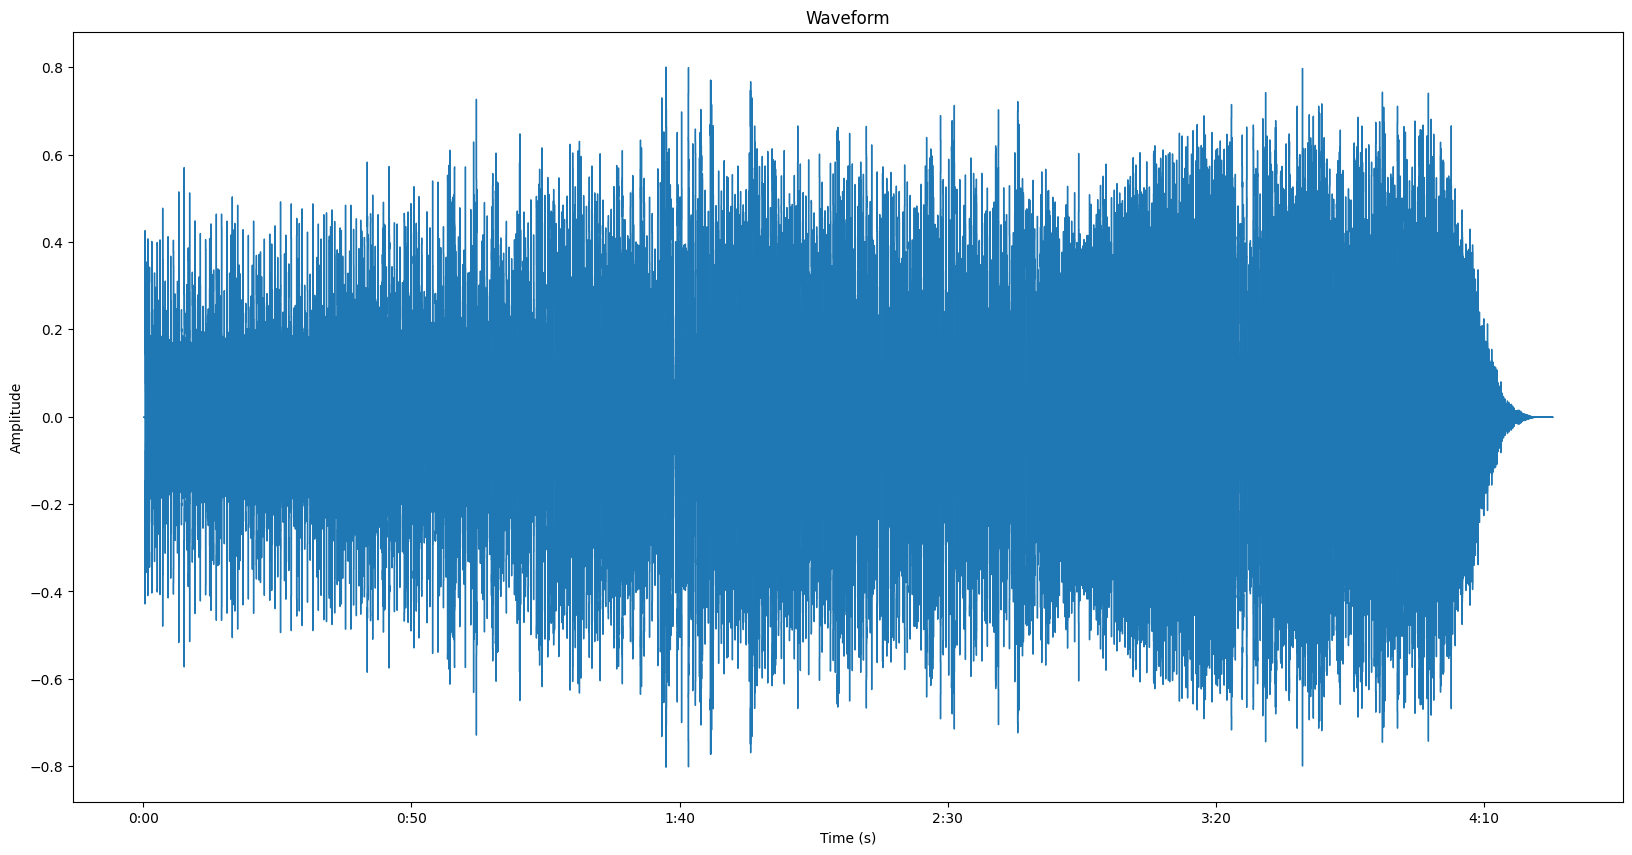

In [17]:
plt.figure(figsize=(20,10))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

lets talk FTs (fourier transforms). to put it simply, a fourier transform takes a signal in the time-domain (the signal is a function of time) and 'transforms' it into a function in the frequency domain (the signal is now a function of freequency). this gives us a more concise and analytical way to express signals. the frequnecy domain representation allows us to identify dominant frequencies and their respective amplitudes. by examining the frequency spectrum, we can identify and isolate different components within a signal, such as distinguishing between different musical notes or identifying specific frequencies in a communication signal

a core application of FTs in my space, is filtering. if we want to reduce noise, or only want to output a signal that falls within a certain frequency range (ex. perhaps the frequency range audible to humans, 20 mHZ to 20 Hz or sum), then frequency representations of signals allows us to easily understand how we'd accomplish this

there's a lot to FTs, i think for the purposes of this file its best to understand them as simply taking a function of time, ie. a signal f(t) where t is in seconds, and converting it into a function of frequency, ie. a signal z(w), where w is in units of frequency rad/s

note the main difference between FTs (fourier transforms) and FFTs (fast fourier transforms) is computational efficiency - the core ideas remain the same

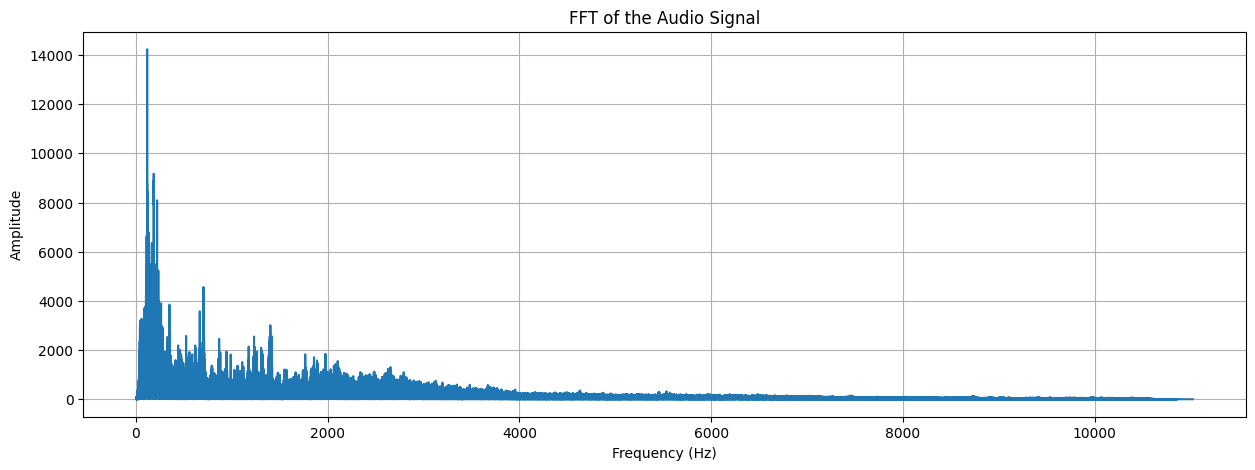

In [20]:
# compute the FFT
fft_result = np.fft.fft(y) # -> y axis
frequencies = np.fft.fftfreq(len(fft_result), 1/sr) # -> x axis

# only take the positive half of the frequencies and corresponding FFT values
# (@dolev this is a property of performing FT on real-valued functions, its symmetric
# across positive and negative frequencies)

positive_frequencies = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Plot the FFT result
plt.figure(figsize=(15, 5))
plt.plot(positive_frequencies, positive_fft)
plt.title('FFT of the Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Back To ZCR

now we start to explore ways to classify music. the ZCR is the average number of times the audio signal crosses the zero amplitude line per time unit, over a given sampling period. the ZCR is higher if the signal is noisier. the limitations of the ZCR as a noisiness feature for music are obvious when considering that with a single sine wave any ZCR value can be generated (by varying the frequency). in particular, the ZCR does not only measure noise, but also pitch

In [24]:
# by default, we compute the zcr across frames of size 2048
zcr = librosa.feature.zero_crossing_rate(y)

In [23]:
zcr

array([[0.02636719, 0.12304688, 0.21875   , ..., 0.10205078, 0.        ,
        0.        ]])

let's see if this works at all, by computing ZCR for different genre songs and observing the average ZCR

In [26]:
j1, _ = librosa.load("../audio/girl_from_ipanema.mp3")
j2, _ = librosa.load("../audio/so_what.mp3")
j3, _ = librosa.load("../audio/what_a_wonderful_world.mp3")

r1, _ = librosa.load("../audio/the_changeling.mp3")
r2, _ = librosa.load("../audio/helter_skelter.mp3")
r3, _ = librosa.load("../audio/highway_star.mp3")

In [47]:
fl = 4096

zcr_j1 = np.mean(librosa.feature.zero_crossing_rate(j1, frame_length = fl), axis = 1)
zcr_j2 = np.mean(librosa.feature.zero_crossing_rate(j2, frame_length = fl), axis = 1)
zcr_j3 = np.mean(librosa.feature.zero_crossing_rate(j3, frame_length = fl), axis = 1)

zcr_r1 = np.mean(librosa.feature.zero_crossing_rate(r1, frame_length = fl), axis = 1)
zcr_r2 = np.mean(librosa.feature.zero_crossing_rate(r2, frame_length = fl), axis = 1)
zcr_r3 = np.mean(librosa.feature.zero_crossing_rate(r3, frame_length = fl), axis = 1)

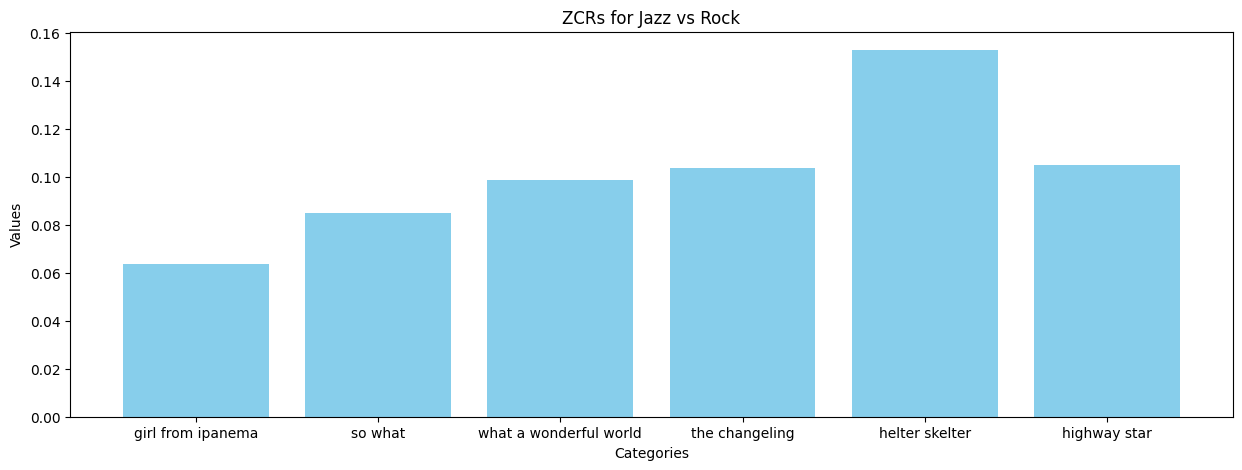

In [53]:
labels = ["girl from ipanema", "so what", "what a wonderful world", "the changeling", "helter skelter", "highway star"]
zcrs = np.concatenate([zcr_j1, zcr_j2, zcr_j3, zcr_r1, zcr_r2, zcr_r3])

plt.figure(figsize = (15, 5))

bars = plt.bar(labels, zcrs, color = 'skyblue')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('ZCRs for Jazz vs Rock')

plt.show()

meh, doesn't really work as expected. need to work on it!